/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/pietertolsma/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:36<00:00, 1.29MB/s]


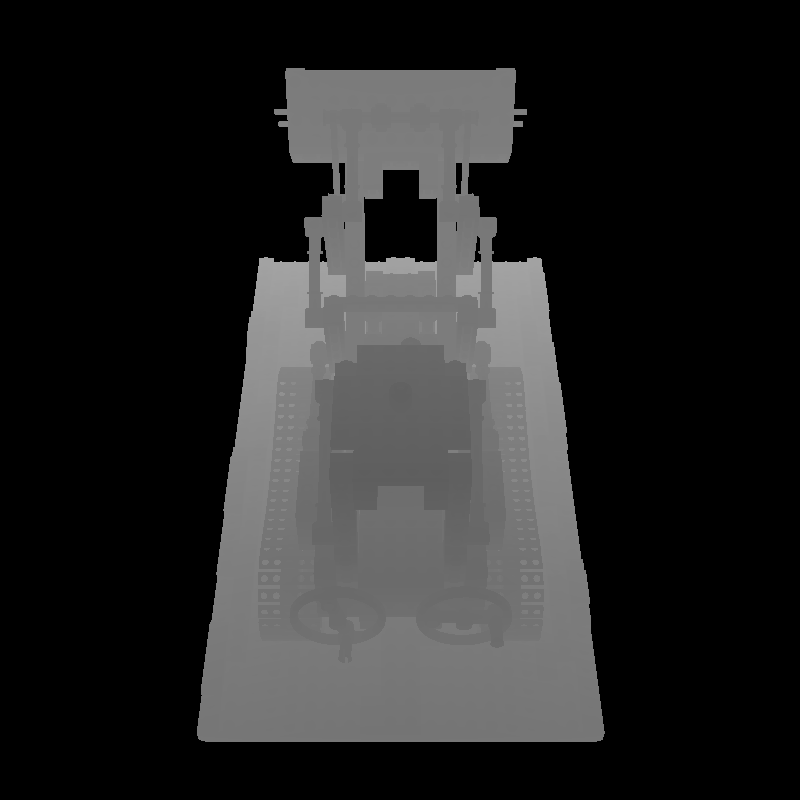

In [1]:
from omegaconf import OmegaConf
from repromvtrans.runner import Runner
import torchvision.transforms as T

import PIL

import numpy as np
from repromvtrans.dataloaders.nerf_synthetic_loader import NerfSyntheticDataset

cfg = cfg = OmegaConf.load("../config/config.yaml")
cfg.datasets.nerf_synthetic.root = "../data/nerf_synthetic/lego"

runner = Runner.load_from_checkpoint("../mvtrans/checkpoint.ckpt", cfg=cfg)
model = runner.model

def tensor_to_img(data, mode=None):
    data *= 255
    return T.ToPILImage(mode=mode)(data)
    

data = NerfSyntheticDataset(cfg)

(imgs, cams), y = data[0]

out = model(imgs, cams, runner.cam_intr)

img = tensor_to_img(y, mode="L")
display(img)



